# 목표 : 최종 성적 예측하기

In [358]:
# 파일 경로 지정

data_file_path = '../data/student-por.csv'    # .data 파일 경로

# .data 파일을 사용하여 데이터프레임 생성
df = pd.read_csv(data_file_path, delimiter=";")# , names=column_names
df.iloc[:,:20].head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes


In [359]:
df.iloc[:,20:33].head(5)

,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [360]:
df.describe() # 정규화, 표준화를 고려할 정도로 값의 차이가 크지 않음 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [361]:
df.info() # null 값은 없네용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [362]:
object_cols = []
for idx, type_ in enumerate(df.dtypes):
    if type_ == "object":
        # print(f"{df.columns[idx]}")
        print(df.iloc[:,idx].value_counts())
        print("\n\n")
        object_cols.append(df.columns[idx])


school
GP    423
MS    226
Name: count, dtype: int64



sex
F    383
M    266
Name: count, dtype: int64



address
U    452
R    197
Name: count, dtype: int64



famsize
GT3    457
LE3    192
Name: count, dtype: int64



Pstatus
T    569
A     80
Name: count, dtype: int64



Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64



Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64



reason
course        285
home          149
reputation    143
other          72
Name: count, dtype: int64



guardian
mother    455
father    153
other      41
Name: count, dtype: int64



schoolsup
no     581
yes     68
Name: count, dtype: int64



famsup
yes    398
no     251
Name: count, dtype: int64



paid
no     610
yes     39
Name: count, dtype: int64



activities
no     334
yes    315
Name: count, dtype: int64



nursery
yes    521
no     128
Name: count, dtype: int64



higher
yes  

In [363]:
# df["total_performence"]=(df["G1"]+df["G2"]+df["G3"])/3

object 데이터는 전부 category 데이터임을 알 수 있음  
- Mjob, Fjob 데이터의 경우 other이 과반수로 제거하는 게 좋을

In [364]:
# df = df.drop(["G1", "G2", "G3"], axis=True)

In [365]:
# 상관관계
df.corr(numeric_only=True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


상관 없어 보이는 col  
"famrel", "goout", "health"

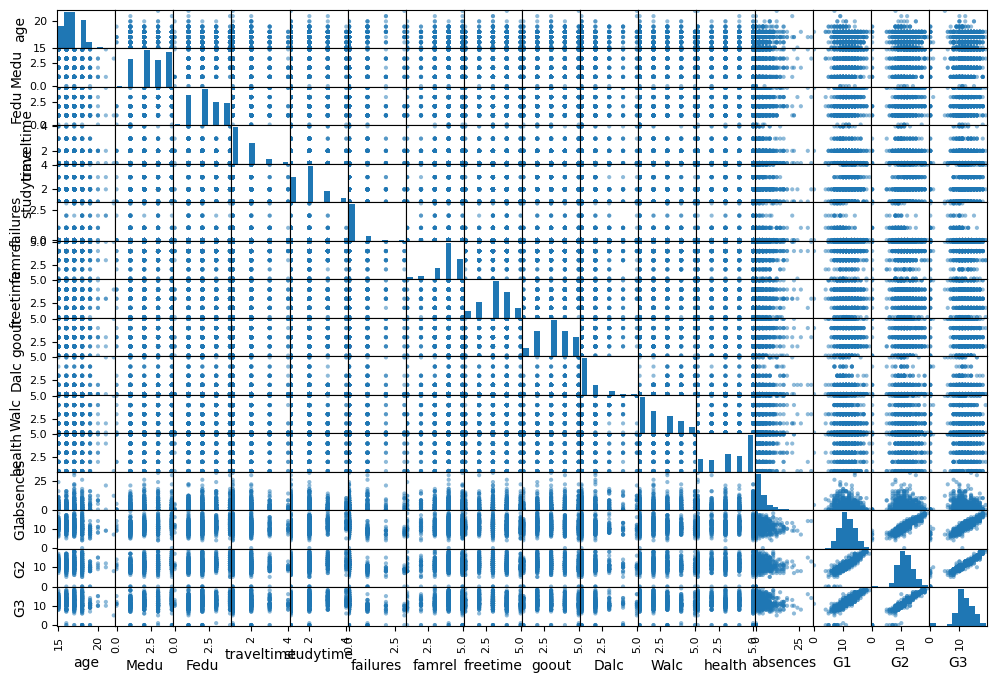

In [366]:
# 상관관계 시각화
from pandas.plotting import scatter_matrix

attributes = df.corr(numeric_only=True).index
df_scatter = scatter_matrix(df[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

<Axes: >

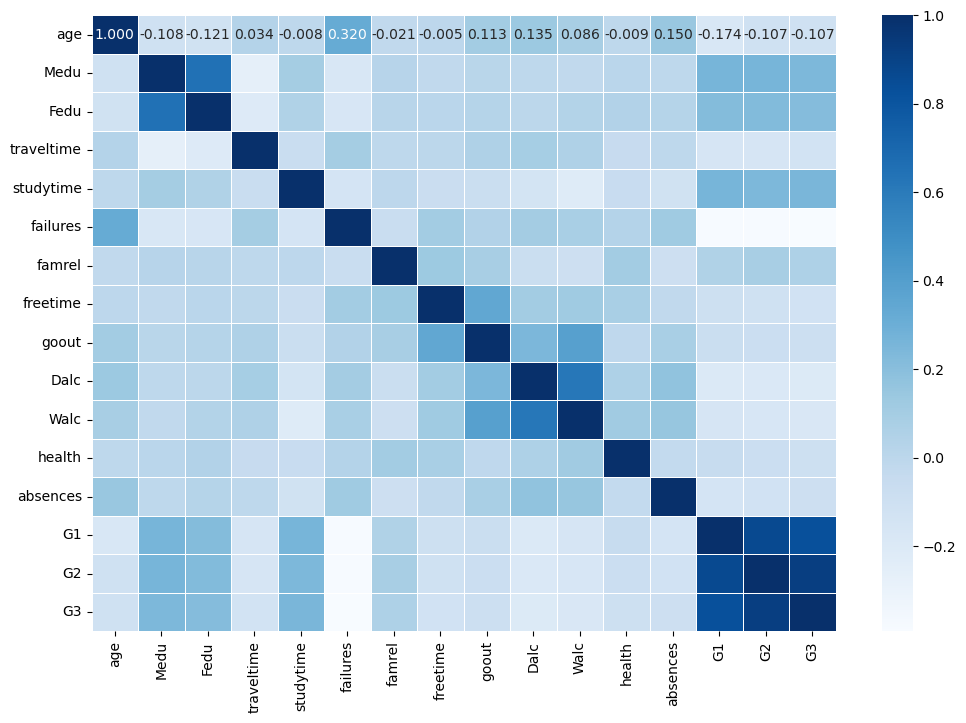

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt
# corr=df.corr(numeric_only=True)
# 와이라노...

plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, cmap="Reds")
sns.heatmap(data = df.corr(numeric_only=True), annot=True, fmt = '.3f', linewidths=.5, cmap='Blues')

In [368]:
object_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

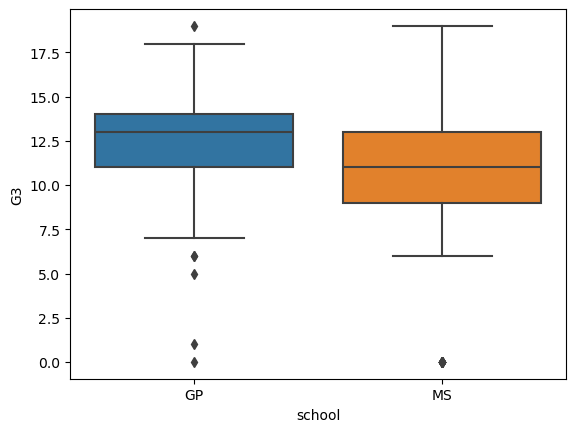

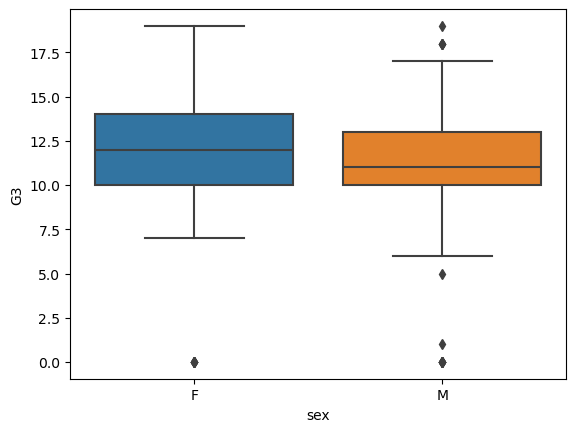

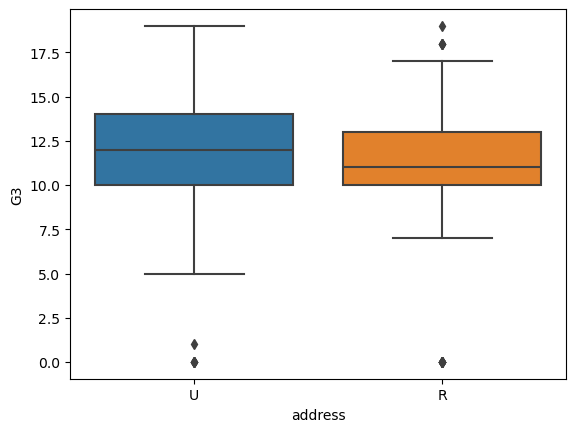

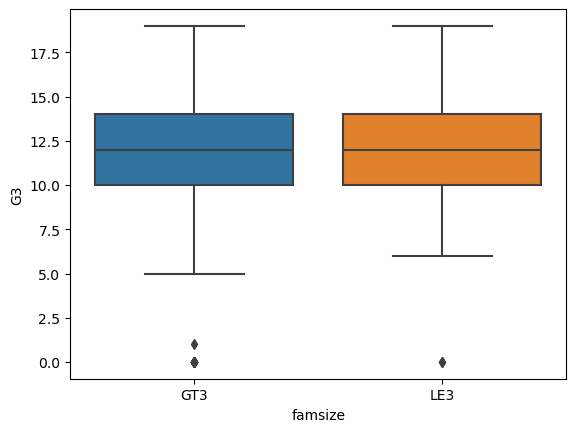

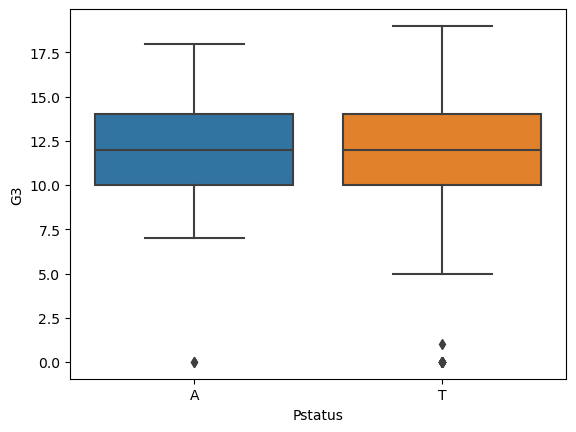

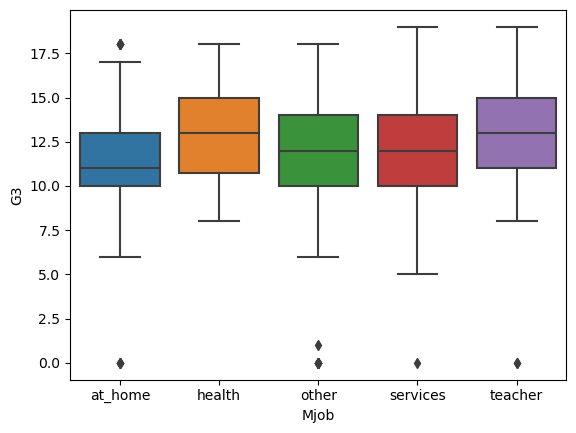

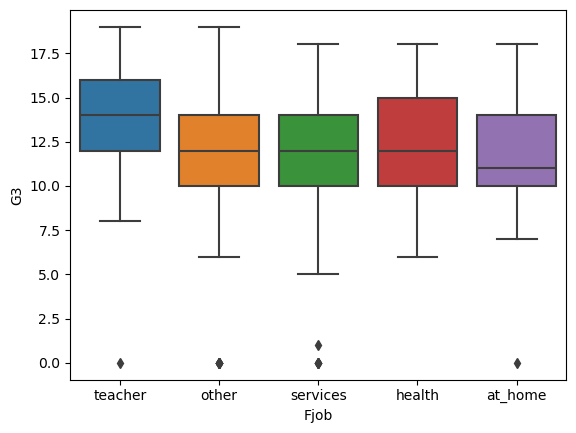

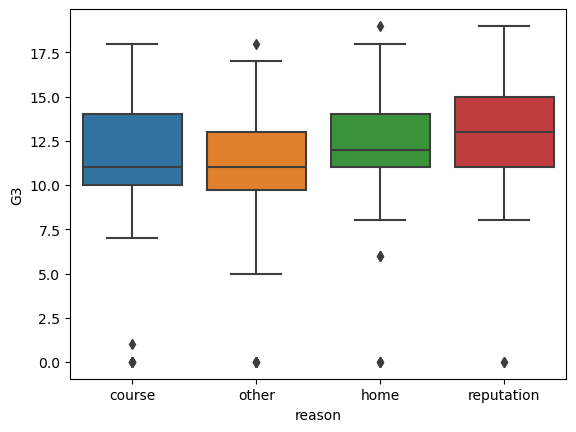

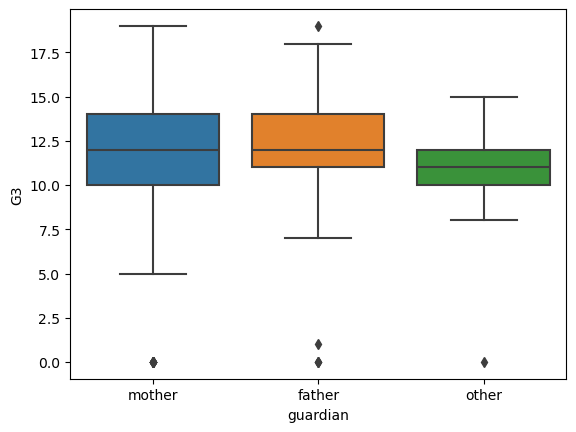

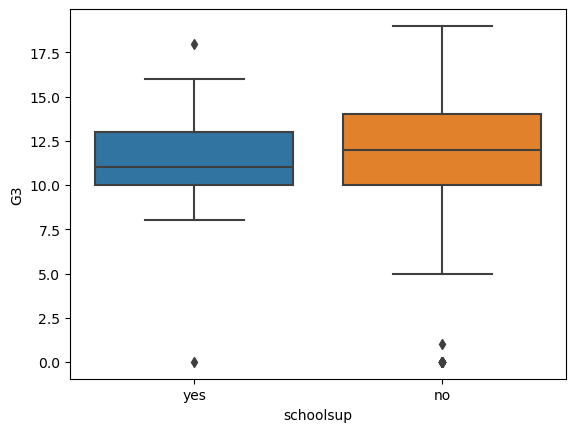

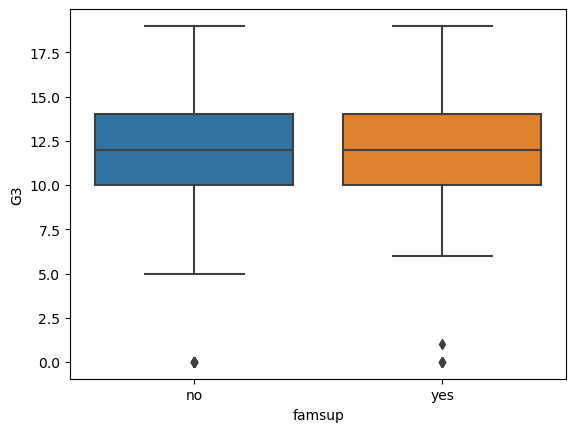

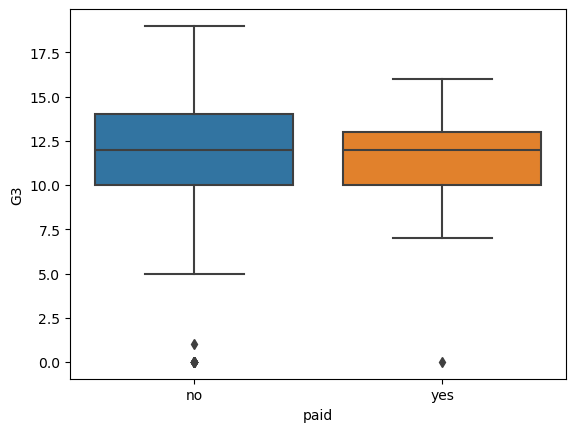

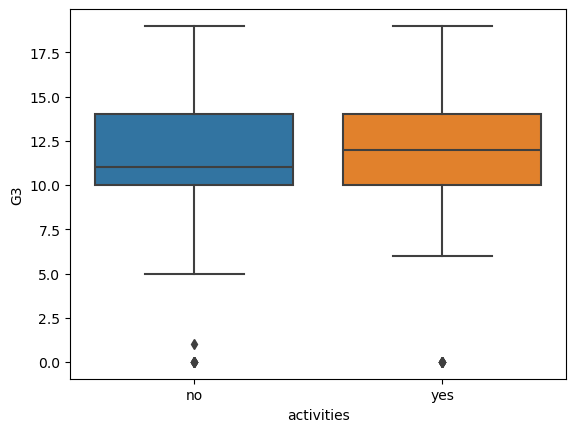

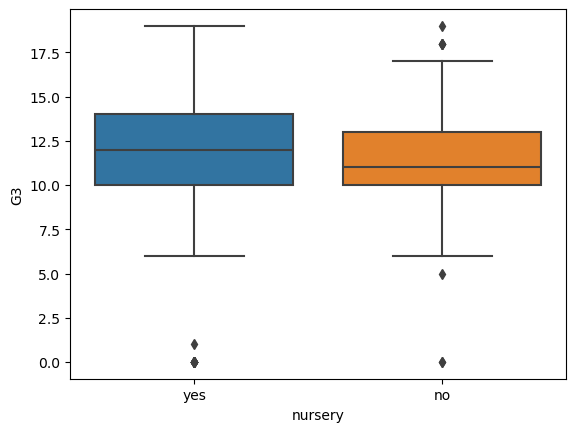

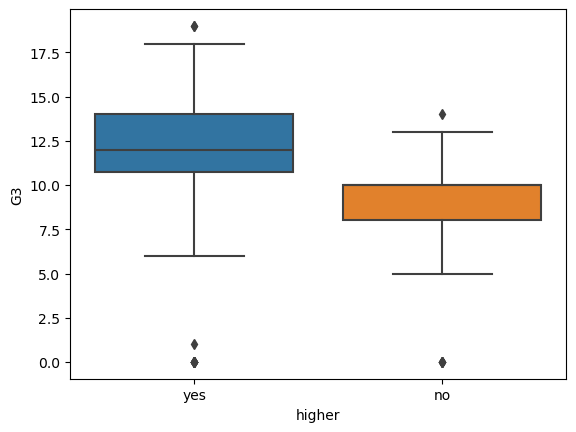

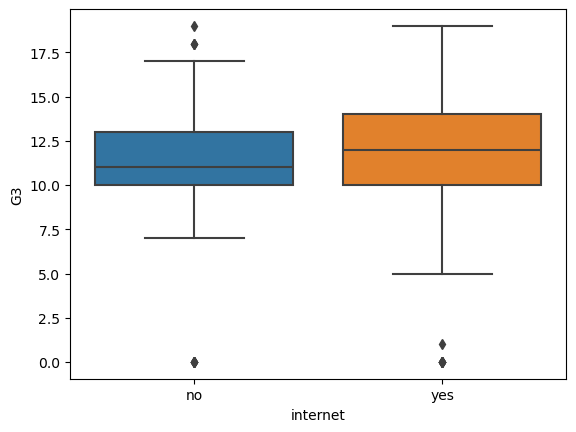

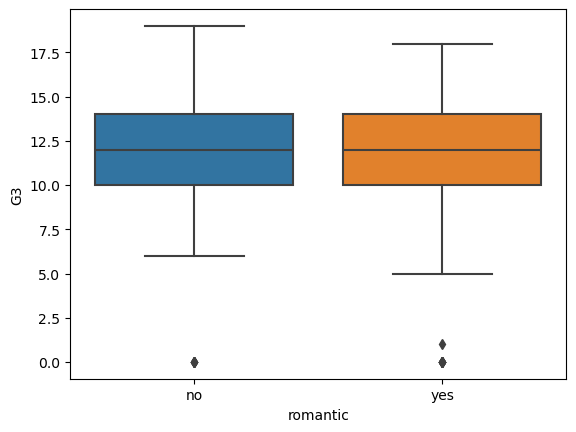

In [370]:
# object형 데이터 
for col_name in object_cols:
    sns.boxplot(x = col_name, y="G3", data=df)
    plt.show()
    


total_performence와 상관 없어 보이는 데이터 -> drop
- famsize : 가족 수
- Pstatus : 부모의 동거 여부
- famsup : 가족 교육 지원
- romantic : 이성교제
- paid : 교육비

관련이 높아 보이는 요소들은 뒤에서 stratify 주기 
- Mjob
- Fjob
- higher
- reason

In [371]:
df = df.drop(["famsize", "Pstatus", "famsup", "romantic", "paid","famrel", "goout", "health"], axis=True)

In [372]:
grade_df = df.copy()

In [373]:
# 위에서 사용했던 object 형만 뽑아내는 for문 
object_cols = []
for idx, type_ in enumerate(grade_df.dtypes):
    if type_ == "object":
        object_cols.append(grade_df.columns[idx])

one-hot encoding / get_dummies로 카테고리형 숫자로 바꾸기

In [374]:
from sklearn.preprocessing import OrdinalEncoder # 카테고리를 텍스트에서 숫자로 

ordinal_encoder = OrdinalEncoder()

for column in grade_df.columns:
    if grade_df[column].dtype == "object":
        grade_df[column] = ordinal_encoder.fit_transform(grade_df[[column]])
        grade_df[column] = grade_df[column].astype(int)
print(grade_df.info())
grade_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int32
 1   sex         649 non-null    int32
 2   age         649 non-null    int64
 3   address     649 non-null    int32
 4   Medu        649 non-null    int64
 5   Fedu        649 non-null    int64
 6   Mjob        649 non-null    int32
 7   Fjob        649 non-null    int32
 8   reason      649 non-null    int32
 9   guardian    649 non-null    int32
 10  traveltime  649 non-null    int64
 11  studytime   649 non-null    int64
 12  failures    649 non-null    int64
 13  schoolsup   649 non-null    int32
 14  activities  649 non-null    int32
 15  nursery     649 non-null    int32
 16  higher      649 non-null    int32
 17  internet    649 non-null    int32
 18  freetime    649 non-null    int64
 19  Dalc        649 non-null    int64
 20  Walc        649 non-null    int6

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,freetime,Dalc,Walc,absences,G1,G2,G3
0,0,0,18,1,4,4,0,4,0,1,...,1,1,0,3,1,1,4,0,11,11
1,0,0,17,1,1,1,0,2,0,0,...,0,1,1,3,1,1,2,9,11,11
2,0,0,15,1,1,1,0,2,2,1,...,1,1,1,3,2,3,6,12,13,12
3,0,0,15,1,4,2,1,3,1,1,...,1,1,1,2,1,1,0,14,14,14
4,0,0,16,1,3,3,2,2,1,0,...,1,1,0,3,1,2,0,11,13,13


## train_test 분리

In [375]:
from sklearn.model_selection import train_test_split

feature_DF = grade_df.iloc[:,:-1]
target_SR = grade_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(feature_DF, target_SR, stratify=feature_DF[["higher"]], random_state=42)

In [376]:
print(f"[Train Dataset] {X_train.shape}, {y_train.shape}")
print(f"[Test Dataset] {X_test.shape}, {y_test.shape}")

[Train Dataset] (486, 24), (486,)
[Test Dataset] (163, 24), (163,)


## 학습
- 지도학습
- feature가 여러 개 -> 다중 선형 회귀 or 다항 회귀

In [377]:
from sklearn.linear_model import LinearRegression

# 모델 생성 및 학습 
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [378]:
print(f"[Train Score] {model.score(X_train, y_train)}\n[Test Score] {model.score(X_test, y_test)}")

[Train Score] 0.8480141550968618
[Test Score] 0.8752811641895565


In [379]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 결과 해석: 모델의 계수 확인
coefficients = pd.Series(model.coef_, index=grade_df.columns[:-1])
print("Coefficients:")
print(coefficients)

Mean Squared Error: 1.2424284913607946
R-squared: 0.8752811641895565
Coefficients:
school       -0.264917
sex          -0.215409
age           0.046776
address       0.166123
Medu         -0.077262
Fedu          0.035685
Mjob          0.009967
Fjob         -0.155771
reason       -0.052737
guardian      0.035048
traveltime    0.206687
studytime     0.012252
failures     -0.388617
schoolsup    -0.154171
activities    0.146930
nursery      -0.248879
higher        0.228610
internet      0.080928
freetime     -0.074668
Dalc         -0.048524
Walc         -0.033249
absences      0.014898
G1            0.133836
G2            0.867748
dtype: float64


멧쨔 에바 무리

# Poly

In [395]:
from sklearn.preprocessing import PolynomialFeatures

poly_preprocessor = PolynomialFeatures(2)

In [409]:
# "Mjob", "Fjob", "higher", "reason"



feature_DF = grade_df.loc[:,["G1","G2"]]
target_SR = grade_df.iloc[:,-1]

In [410]:
x = poly_preprocessor.fit_transform(feature_DF)
x

array([[  1.,   0.,  11.,   0.,   0., 121.],
       [  1.,   9.,  11.,  81.,  99., 121.],
       [  1.,  12.,  13., 144., 156., 169.],
       ...,
       [  1.,  11.,  12., 121., 132., 144.],
       [  1.,  10.,  10., 100., 100., 100.],
       [  1.,  10.,  11., 100., 110., 121.]])

In [411]:
poly_preprocessor.get_feature_names_out(feature_DF.columns)

array(['1', 'G1', 'G2', 'G1^2', 'G1 G2', 'G2^2'], dtype=object)

In [412]:
feature_DF = pd.DataFrame(x, columns=poly_preprocessor.get_feature_names_out(feature_DF.columns))
X_train, X_test, y_train, y_test = train_test_split(feature_DF, target_SR, random_state=42)

In [413]:
# 모델 생성 및 학습 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [414]:
print(f"[Train Score] {model.score(X_train, y_train)}\n[Test Score] {model.score(X_test, y_test)}")

[Train Score] 0.841670043083229
[Test Score] 0.8744949276399323


과적합...우우 # feature를 줄이니까 과적합 안남

In [415]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.2651689766397556
R-squared: 0.8744949276399323
